# Module 5 : Performance measurements of  Random Forest algorithms

In [1]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import numpy as n
import seaborn as sns

In [2]:
#Load given dataset
data = p.read_csv("diabetes.csv")


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
df=data.dropna()

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
data.shape

(768, 9)

In [10]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [11]:
data.corr().describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.207326,0.306582,0.246427,0.239677,0.250539,0.286731,0.206903,0.244379,0.295971
std,0.355127,0.287678,0.293757,0.341550,0.324265,0.293406,0.307331,0.346347,0.291143
min,-0.081672,0.057328,0.041265,-0.113970,-0.073535,0.017683,-0.033523,-0.113970,0.065068
25%,-0.033523,0.137337,0.088933,0.057328,0.088933,0.140647,0.041265,0.033561,0.130548
50%,0.129459,0.221071,0.152590,0.183928,0.185071,0.221071,0.140647,0.238356,0.221898
75%,0.221898,0.331357,0.239528,0.392573,0.331357,0.292695,0.183928,0.263514,0.292695
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [14]:
X = data.drop(labels='Outcome', axis=1)
#Response variable
y = data.loc[:,'Outcome']    

In [15]:

#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Random Forest:


Classification report of Random Forest Results:

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       150
           1       0.67      0.54      0.60        81

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231

Accuracy result of Random Forest is: 74.45887445887446

Confusion Matrix result of Random Forest is:
 [[128  22]
 [ 37  44]]

Sensitivity :  0.8533333333333334

Specificity :  0.5432098765432098

Cross validation test results of accuracy:
[0.74675325 0.73376623 0.77272727 0.83006536 0.77777778]

Accuracy result of Random Forest is: 77.2217978100331


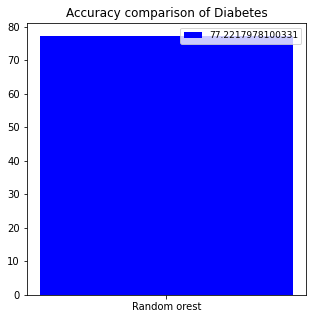

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier()

rfc.fit(X_train,y_train)

predictR = rfc.predict(X_test)

print("")
print('Classification report of Random Forest Results:')
print("")

print(classification_report(y_test,predictR))
x = (accuracy_score(y_test,predictR)*100)

print('Accuracy result of Random Forest is:', x)
print("")
cm1=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Random Forest is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")

accuracy = cross_val_score(rfc, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of Random Forest is:",accuracy.mean() * 100)
RFC=accuracy.mean() * 100





def graph():
    import matplotlib.pyplot as plt
    data=[RFC]
    alg="Random orest"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("b"))
    plt.title("Accuracy comparison of Diabetes")
    plt.legend(b,data,fontsize=9)




graph()


True Positive : 44
True Negative : 37
False Positive : 22
False Negative : 128

True Positive Rate : 0.2558139534883721
True Negative Rate : 0.6271186440677966
False Positive Rate : 0.3728813559322034
False Negative Rate : 0.7441860465116279

Positive Predictive Value : 0.6666666666666666
Negative predictive value : 0.22424242424242424
Confusion matrix-RF:
[[128  22]
 [ 37  44]]


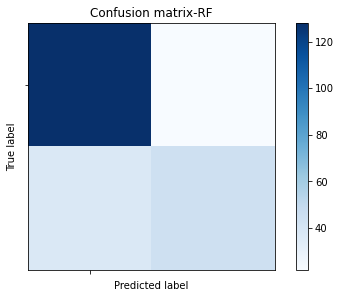

In [17]:
TN = cm1[1][0]
FN = cm1[0][0]
TP = cm1[1][1]
FP = cm1[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

def plot_confusion_matrix(cm2, title='Confusion matrix-RF', cmap=plt.cm.Blues):
    target_names=['']
    plt.imshow(cm2, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = n.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm2=confusion_matrix(y_test, predictR)
print('Confusion matrix-RF:')
print(cm2)
plot_confusion_matrix(cm2)